<a href="https://colab.research.google.com/github/risa1796/EDA-ML-exercises/blob/main/Stolen_Bike_Report_in_Berlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stolen Bike report in Berlin Germany 

Data achieved from https://www.kaggle.com/datasets/staefff/stolen-bike-report-berlin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/딥러닝기초

/content/drive/MyDrive/딥러닝기초


In [ ]:
import pandas as pd 

## Data Upload

In [ ]:
df = pd.read_csv('./Fahrraddiebstahl.csv', encoding="ISO-8859-1",  parse_dates=['ANGELEGT_AM','TATZEIT_ANFANG_DATUM','TATZEIT_ENDE_DATUM'])
df.head()

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
0,2022-02-22,2022-02-21,16,2022-02-21,21,4501148,590,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
1,2022-02-22,2022-02-22,7,2022-02-22,13,4300621,750,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2,2022-02-22,2022-02-22,7,2022-02-22,14,3400721,1700,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
3,2022-02-22,2022-02-22,14,2022-02-22,19,3400721,1500,Nein,Rennrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
4,2022-02-22,2022-02-21,20,2022-02-22,6,3500936,800,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


## EDA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21646 entries, 0 to 21645
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ANGELEGT_AM            21646 non-null  datetime64[ns]
 1   TATZEIT_ANFANG_DATUM   21646 non-null  datetime64[ns]
 2   TATZEIT_ANFANG_STUNDE  21646 non-null  int64         
 3   TATZEIT_ENDE_DATUM     21646 non-null  datetime64[ns]
 4   TATZEIT_ENDE_STUNDE    21646 non-null  int64         
 5   LOR                    21646 non-null  int64         
 6   SCHADENSHOEHE          21646 non-null  int64         
 7   VERSUCH                21646 non-null  object        
 8   ART_DES_FAHRRADS       21646 non-null  object        
 9   DELIKT                 21646 non-null  object        
 10  ERFASSUNGSGRUND        21646 non-null  object        
dtypes: datetime64[ns](3), int64(4), object(4)
memory usage: 1.8+ MB


### Duplicates

In [ ]:
df.drop_duplicates(keep='last',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21645
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ANGELEGT_AM            21612 non-null  datetime64[ns]
 1   TATZEIT_ANFANG_DATUM   21612 non-null  datetime64[ns]
 2   TATZEIT_ANFANG_STUNDE  21612 non-null  int64         
 3   TATZEIT_ENDE_DATUM     21612 non-null  datetime64[ns]
 4   TATZEIT_ENDE_STUNDE    21612 non-null  int64         
 5   LOR                    21612 non-null  int64         
 6   SCHADENSHOEHE          21612 non-null  int64         
 7   VERSUCH                21612 non-null  object        
 8   ART_DES_FAHRRADS       21612 non-null  object        
 9   DELIKT                 21612 non-null  object        
 10  ERFASSUNGSGRUND        21612 non-null  object        
dtypes: datetime64[ns](3), int64(4), object(4)
memory usage: 2.0+ MB


Drop duplicates

### Average bicycle price (loss)

In [ ]:
df.describe()

,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE
count,21612.000000,21612.000000,2.161200e+04,21612.000000
mean,14.525032,13.331991,5.451360e+06,904.668934
std,5.312350,5.248809,3.323157e+06,868.593522
min,0.000000,0.000000,1.100101e+06,0.000000
25%,10.000000,9.000000,2.500729e+06,400.000000
50%,16.000000,14.000000,4.400835e+06,649.000000
75%,19.000000,17.250000,8.100312e+06,1050.000000
max,23.000000,23.000000,1.260124e+07,9999.000000


>  Average Amount of loss (= price of stolen bicycle) is around 650 EUR.

### Time Period

In [ ]:
for i in df.select_dtypes('datetime64[ns]').columns:
  print(f'{i} - Min: {df[i].min()} , Max: {df[i].max()}')


ANGELEGT_AM - Min: 2021-01-01 00:00:00 , Max: 2022-12-02 00:00:00
TATZEIT_ANFANG_DATUM - Min: 2021-01-01 00:00:00 , Max: 2022-12-02 00:00:00
TATZEIT_ENDE_DATUM - Min: 2021-01-01 00:00:00 , Max: 2022-12-02 00:00:00


> Time period of dataset Jan 2021 to Dec 2022

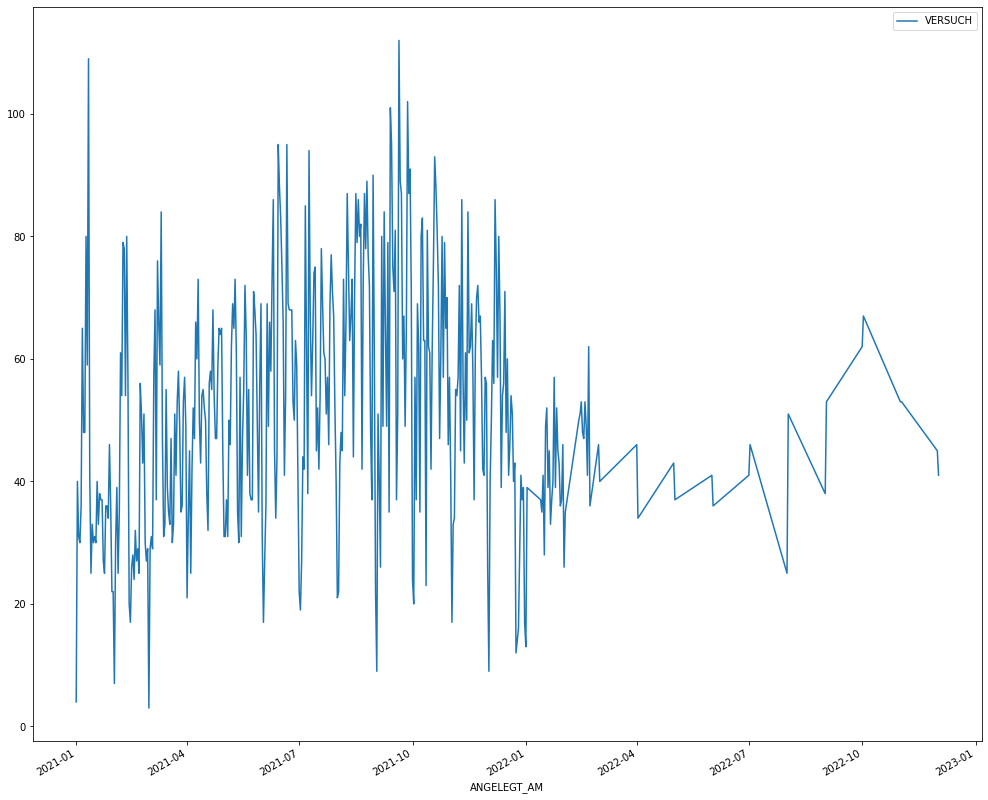

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (17,15)

pd.pivot_table(df,
               index='ANGELEGT_AM',
               values='VERSUCH',
               aggfunc='count').plot()

It seems some dates are missing

In [ ]:
missing_days= pd.date_range(start = df['ANGELEGT_AM'].min(), end = df['ANGELEGT_AM'].max()).difference(df.ANGELEGT_AM)

In [ ]:
len(missing_days)

283

In [ ]:
missing_days[:30]

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
               '2022-01-11', '2022-01-12', '2022-02-03', '2022-02-04',
               '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26',
               '2022-02-27', '2022-02-28', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06'],
              dtype='datetime64[ns]', freq=None)

Mostly in 2022, this is the reason why chart looks odd in 2022. Less data compared to 2021

forecasting available? Not so appropriate for this case.. From 2022 we have only few days (cuz 365-283=!?)

Comparing 2021 and 2022 is also difficult.. 

### Locations

Let's look at locations 

In [ ]:
df['LOR'].value_counts()

9100101     272
2300419     216
1100309     156
3601243     155
1100310     149
           ... 
3300515       1
12200414      1
6200418       1
4200204       1
10200419      1
Name: LOR, Length: 538, dtype: int64

We need second table where we can check location names.

In [ ]:
geodf = pd.read_csv('./e92665fb.xlsx - Table 1.csv')
geodf.head(10)

,PGR ID,PGR Name,BZR ID,BZR Name,PLR ID,PLR Name
0,710.0,Schöneberg Nord,71001.0,Schöneberg Nordwest,7100101,Wittenbergplatz
1,NaN,NaN,NaN,NaN,7100102,Kalckreuthstraße
2,NaN,NaN,NaN,NaN,7100103,Frobenstraße
3,NaN,NaN,71002.0,Schöneberg Nordost,7100204,Barbarossaplatz
4,NaN,NaN,NaN,NaN,7100205,Alvenslebenstraße
5,NaN,NaN,NaN,NaN,7100206,Großgörschenstraße
6,720.0,Schöneberg Süd,72003.0,Schöneberg Südwest,7200307,Bayerischer Platz
7,NaN,NaN,NaN,NaN,7200308,Volkspark (Rudolph- Wilde-Park)
8,NaN,NaN,72004.0,Schöneberg Südost,7200409,Belziger Straße
9,NaN,NaN,NaN,NaN,7200410,Feurigstraße


This need a few steps of data preprocessing.

In [ ]:
# Fill na fill with the previous value. If there is a value, leave it.  
def fillnas(idx,col):
  x = geodf.loc[idx,col]
  
  if pd.isna(x):
    prev_idx = idx-1
    prev_x = geodf.loc[prev_idx,col]
    geodf.loc[idx,col] = prev_x
  else:
    pass

col_list = list(geodf.columns)[:4]
for col in col_list:
  for idx in range(len(geodf)):
    fillnas(idx,col)

In [ ]:
geodf.head()

,PGR ID,PGR Name,BZR ID,BZR Name,PLR ID,PLR Name
0,710.0,Schöneberg Nord,71001.0,Schöneberg Nordwest,7100101,Wittenbergplatz
1,710.0,Schöneberg Nord,71001.0,Schöneberg Nordwest,7100102,Kalckreuthstraße
2,710.0,Schöneberg Nord,71001.0,Schöneberg Nordwest,7100103,Frobenstraße
3,710.0,Schöneberg Nord,71002.0,Schöneberg Nordost,7100204,Barbarossaplatz
4,710.0,Schöneberg Nord,71002.0,Schöneberg Nordost,7100205,Alvenslebenstraße


In [ ]:
geodff = geodf.copy()
geodff= geodff[['PGR Name','PLR ID','PLR Name']]
geodff.head()

,PGR Name,PLR ID,PLR Name
0,Schöneberg Nord,7100101,Wittenbergplatz
1,Schöneberg Nord,7100102,Kalckreuthstraße
2,Schöneberg Nord,7100103,Frobenstraße
3,Schöneberg Nord,7100204,Barbarossaplatz
4,Schöneberg Nord,7100205,Alvenslebenstraße


Lets join the two tables by LOR ID

In [ ]:
dff= df.merge(geodff, how='left',right_on='PLR ID',left_on='LOR')
dff.head()

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,PGR Name,PLR ID,PLR Name
0,2022-02-22,2022-02-21,16,2022-02-21,21,4501148,590,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Wilmersdorf Zentrum,4501148,Brabanter Platz
1,2022-02-22,2022-02-22,7,2022-02-22,13,4300621,750,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Charlottenburg Zentrum,4300621,Richard-Wagner-Straße
2,2022-02-22,2022-02-22,7,2022-02-22,14,3400721,1700,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Südliches Pankow,3400721,Florakiez
3,2022-02-22,2022-02-22,14,2022-02-22,19,3400721,1500,Nein,Rennrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Südliches Pankow,3400721,Florakiez
4,2022-02-22,2022-02-21,20,2022-02-22,6,3500936,800,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Südliches Weißensee,3500936,Komponistenviertel Weißensee


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ANGELEGT_AM            21612 non-null  datetime64[ns]
 1   TATZEIT_ANFANG_DATUM   21612 non-null  datetime64[ns]
 2   TATZEIT_ANFANG_STUNDE  21612 non-null  int64         
 3   TATZEIT_ENDE_DATUM     21612 non-null  datetime64[ns]
 4   TATZEIT_ENDE_STUNDE    21612 non-null  int64         
 5   LOR                    21612 non-null  int64         
 6   SCHADENSHOEHE          21612 non-null  int64         
 7   VERSUCH                21612 non-null  object        
 8   ART_DES_FAHRRADS       21612 non-null  object        
 9   DELIKT                 21612 non-null  object        
 10  ERFASSUNGSGRUND        21612 non-null  object        
 11  PGR Name               21612 non-null  object        
 12  PLR ID                 21612 non-null  int64         
 13  P

In [ ]:
dff.isna().sum()

ANGELEGT_AM              0
TATZEIT_ANFANG_DATUM     0
TATZEIT_ANFANG_STUNDE    0
TATZEIT_ENDE_DATUM       0
TATZEIT_ENDE_STUNDE      0
LOR                      0
SCHADENSHOEHE            0
VERSUCH                  0
ART_DES_FAHRRADS         0
DELIKT                   0
ERFASSUNGSGRUND          0
PGR Name                 0
PLR ID                   0
PLR Name                 0
dtype: int64

Merged perfectly! 

#### PGR Name

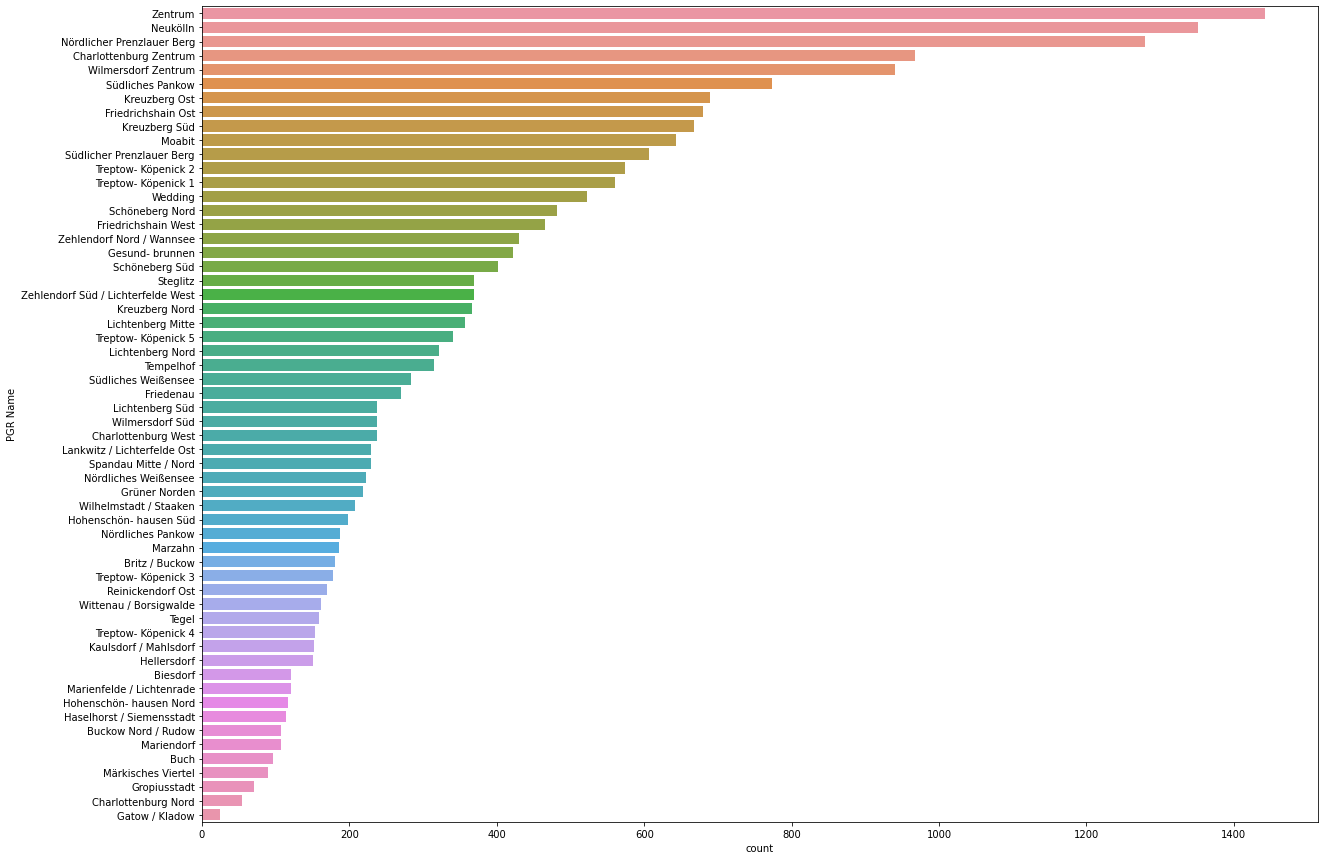

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.rcParams["figure.figsize"] = (20,15)

# count plot on single categorical variable
sns.countplot(y ='PGR Name', data = dff, order = dff['PGR Name'].value_counts().index)
 
# Show the plot
plt.show()

Zentrum has the highest number of stolen bicycles in the last two years, followed by Neukölln and northern Prenzlauer Berg.

#### PLR Name 

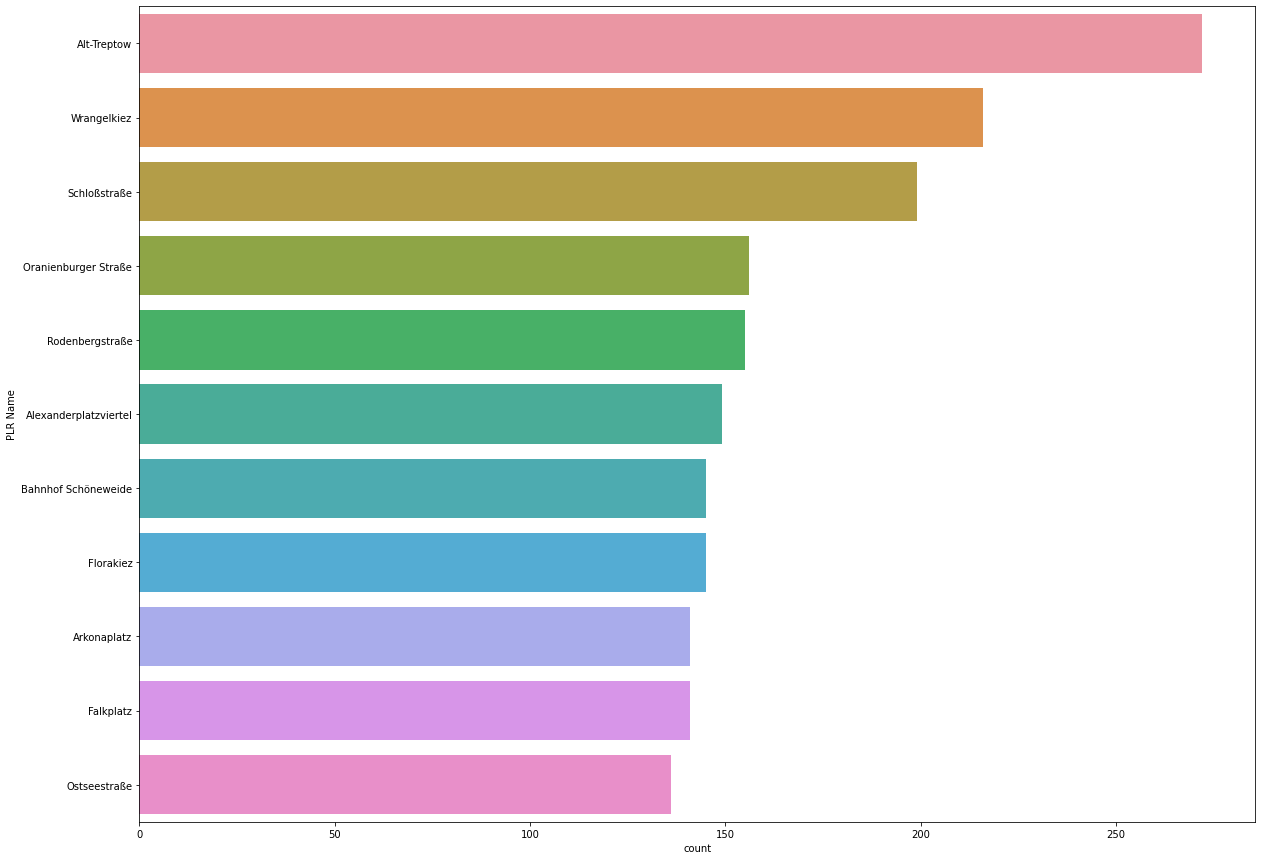

In [ ]:
plt.rcParams["figure.figsize"] = (20,15)

# count plot on single categorical variable
sns.countplot(y ='PLR Name', data = dff, order = dff['PLR Name'].value_counts()[:11].index)
 
# Show the plot
plt.show()

When we look occurance chart by PLR Name, Alt-Treptow has the highest risk.

### Time 

Let's take a look at the time of occurance

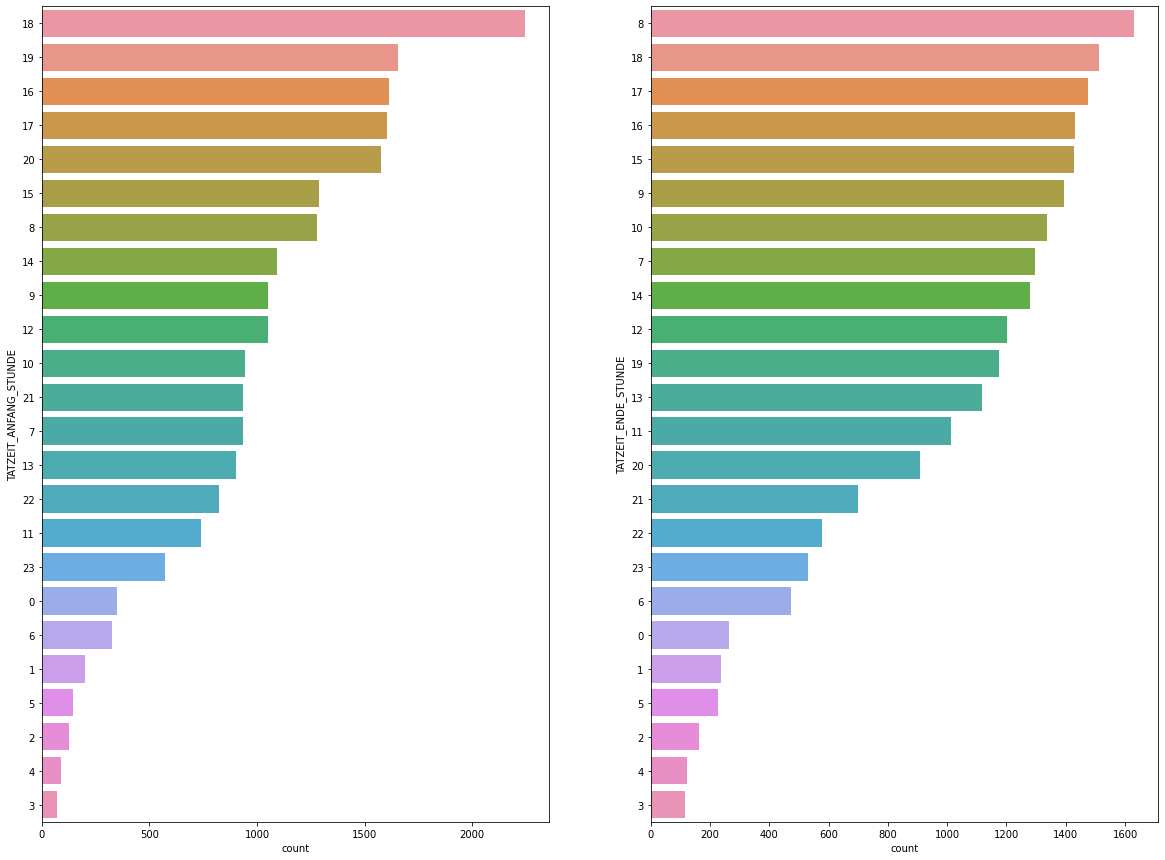

In [ ]:
fig, axes = plt.subplots(1, 2)

# count plot on single categorical variable
sns.countplot(ax=axes[0], y ='TATZEIT_ANFANG_STUNDE', data = dff, order = dff['TATZEIT_ANFANG_STUNDE'].value_counts().index)
sns.countplot(ax=axes[1], y ='TATZEIT_ENDE_STUNDE', data = dff, order = dff['TATZEIT_ENDE_STUNDE'].value_counts().index)

# Show the plot
plt.show()

It's useful to know around what time the actions took place. But the second chart is less informative. It would be better to check the time difference. 

In [ ]:
dff['ANFANG_ZEIT'] = dff['TATZEIT_ANFANG_DATUM'].astype(str) +' '+ dff['TATZEIT_ANFANG_STUNDE'].astype(str)
dff['ENDE_ZEIT'] = dff['TATZEIT_ENDE_DATUM'].astype(str) +' '+ dff['TATZEIT_ENDE_STUNDE'].astype(str)

In [ ]:
from datetime import datetime

def time(x):
  x = datetime.strptime(x, '%Y-%m-%d %H')
  return x

dff['ANFANG_ZEIT'] = dff['ANFANG_ZEIT'].apply(lambda x : time(x)) 
dff['ENDE_ZEIT'] = dff['ENDE_ZEIT'].apply(lambda x : time(x)) 

In [ ]:
dff['ZEIT_DIFFERENZ'] = dff['ENDE_ZEIT'] - dff['ANFANG_ZEIT']

#### Hour difference

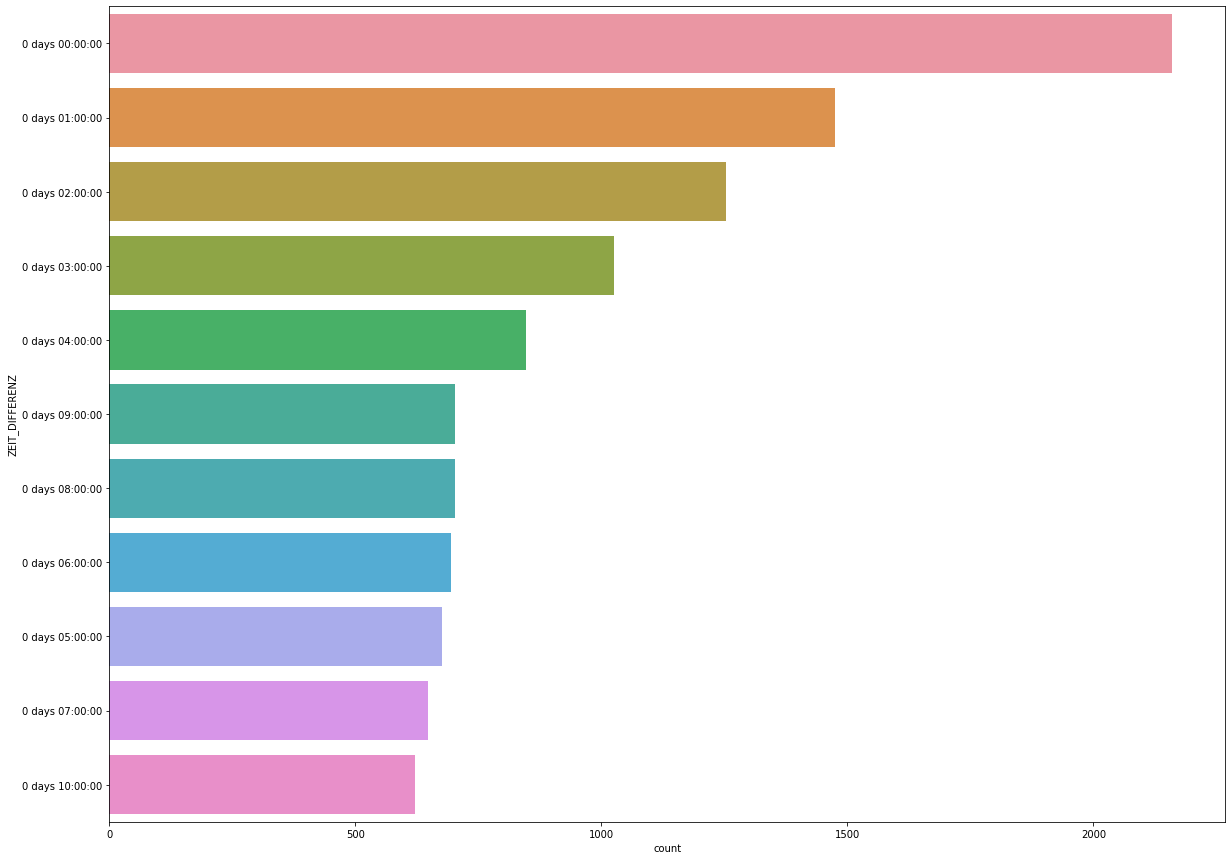

In [ ]:
# count plot on single categorical variable
sns.countplot(y ='ZEIT_DIFFERENZ', data = dff, order = dff['ZEIT_DIFFERENZ'].value_counts()[:11].index)
 
# Show the plot
plt.show()

Most of the stealing happened within one hour.

### Reasons, Method

In [ ]:
dff['ERFASSUNGSGRUND'].unique()

array(['Sonstiger schwerer Diebstahl von Fahrrädern',
       'Einfacher Diebstahl von Fahrrädern',
       'Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern',
       'Einfacher Diebstahl aus Keller/Boden von Fahrrädern'],
      dtype=object)

In [ ]:
dff['DELIKT'].unique()

array(['Fahrraddiebstahl', 'Keller- und Bodeneinbruch'], dtype=object)

> Mostly Fahrraddiebstahl. Lets check the reasons

Fahrraddiebstahl


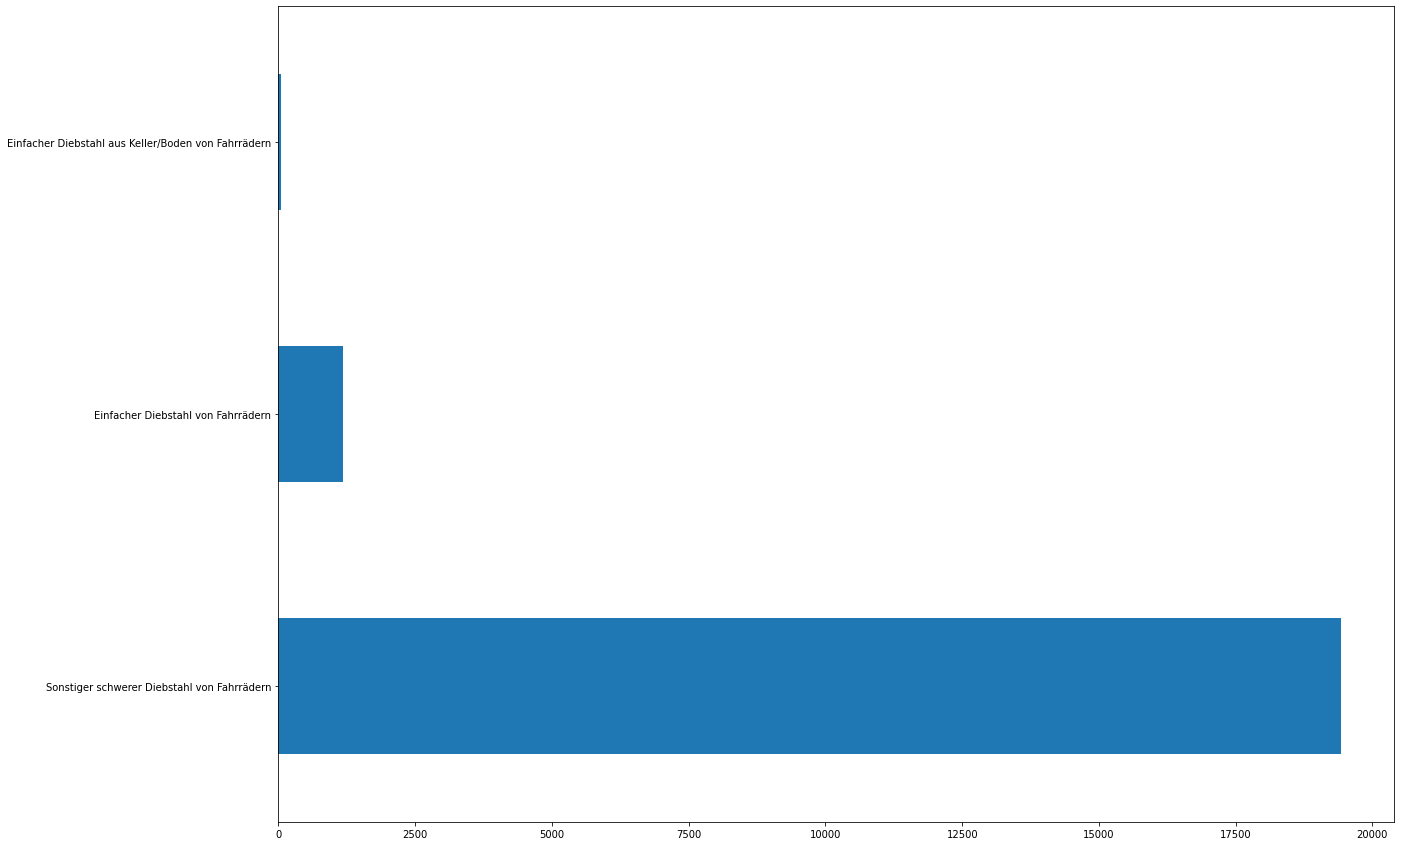

Keller- und Bodeneinbruch


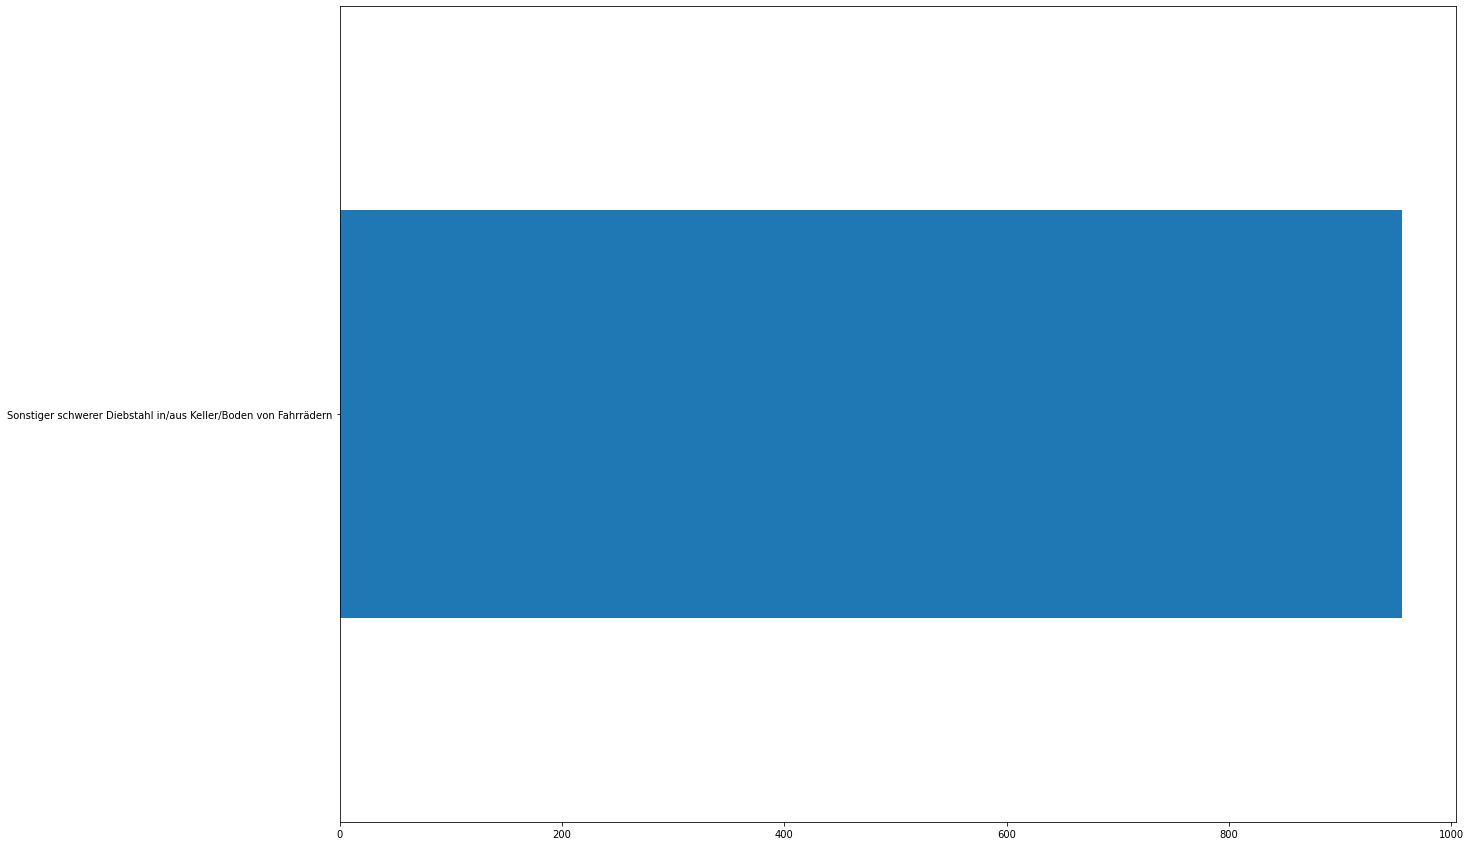

In [ ]:
import matplotlib.pyplot as plt

for casee in dff['DELIKT'].unique().tolist():
  print(casee)
  temp = dff[dff['DELIKT']==casee]
  display(temp['ERFASSUNGSGRUND'].value_counts().plot.barh())

  plt.show()

### Number of occurances

Check the success rate of stealing

In [ ]:
dff['VERSUCH'].value_counts()

Nein         21519
Ja              85
Unbekannt        8
Name: VERSUCH, dtype: int64

> Actually Nein means stealing has occured without being caught by police. Since it is confusing, lets changed them to numeric. Since there are only 8 Unbekannt, we will put them into the majority class.

In [ ]:
def versuch_map(x):
  if x == 'Ja':
    y = 0 # Stealing failed
  else:
    y = 1

  return y
   
dff['VERSUCH'] = dff['VERSUCH'].apply(lambda x: versuch_map(x))
dff.VERSUCH.value_counts()

1    21527
0       85
Name: VERSUCH, dtype: int64

### Failed cases (Caught by police)

> From total cases 85 attempts were failed, rest  were all stolen. Let's check if there is a reason for the fail attempt.

In [ ]:
failed_df = dff[dff['VERSUCH']==0]
failed_df.describe()

,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,PLR ID,ZEIT_DIFFERENZ
count,85.000000,85.000000,8.500000e+01,85.0,85.0,8.500000e+01,85
mean,13.482353,13.776471,5.555987e+06,0.0,0.0,5.555987e+06,1 days 12:09:10.588235294
std,7.085552,6.904754,3.021543e+06,0.0,0.0,3.021543e+06,7 days 19:53:13.534300630
min,0.000000,1.000000,1.100103e+06,0.0,0.0,1.100103e+06,0 days 00:00:00
25%,9.000000,9.000000,3.500936e+06,0.0,0.0,3.500936e+06,0 days 00:00:00
50%,15.000000,15.000000,4.501042e+06,0.0,0.0,4.501042e+06,0 days 00:00:00
75%,20.000000,20.000000,8.100206e+06,0.0,0.0,8.100206e+06,0 days 01:00:00
max,23.000000,23.000000,1.250093e+07,0.0,0.0,1.250093e+07,58 days 18:00:00


Since the attempt was not successful, bike is safe ,so the amount of loss is 0. That absolutely makes sense! 

In [ ]:
failed_df['DELIKT'].value_counts()

Fahrraddiebstahl             84
Keller- und Bodeneinbruch     1
Name: DELIKT, dtype: int64

In [ ]:
failed_df['ERFASSUNGSGRUND'].value_counts()

Sonstiger schwerer Diebstahl von Fahrrädern                        63
Einfacher Diebstahl von Fahrrädern                                 21
Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern     1
Name: ERFASSUNGSGRUND, dtype: int64

### Average bicylce price & number of occurance by districts


In [ ]:
dff.columns

Index(['ANGELEGT_AM', 'TATZEIT_ANFANG_DATUM', 'TATZEIT_ANFANG_STUNDE',
       'TATZEIT_ENDE_DATUM', 'TATZEIT_ENDE_STUNDE', 'LOR', 'SCHADENSHOEHE',
       'VERSUCH', 'ART_DES_FAHRRADS', 'DELIKT', 'ERFASSUNGSGRUND', 'PGR Name',
       'PLR ID', 'PLR Name', 'ANFANG_ZEIT', 'ENDE_ZEIT', 'ZEIT_DIFFERENZ'],
      dtype='object')

In [ ]:
pivotdf = pd.pivot_table(dff,
              index='PGR Name',
              values='SCHADENSHOEHE',
              aggfunc=('mean','count'))
pivotdf.sort_values(by='mean', ascending=False)              

,count,mean
PGR Name,,
Charlottenburg Nord,54.0,1105.888889
Zentrum,1442.0,1085.333564
Südlicher Prenzlauer Berg,606.0,1051.995050
Charlottenburg Zentrum,968.0,1032.163223
Wilmersdorf Zentrum,940.0,1025.588298
Kreuzberg Ost,689.0,990.050798
Haselhorst / Siemensstadt,114.0,985.991228
Steglitz,369.0,981.840108
Friedrichshain West,466.0,969.467811


In [ ]:
len(dff[dff['PGR Name'] == 'Charlottenburg Nord'])

54

It is interesting to find out that Charlottenburg Nord has the highest average bicycle price, but very low risk! 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe17247f5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe17247f7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe172456880>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe17247f9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe17245f940>],
 'means': []}

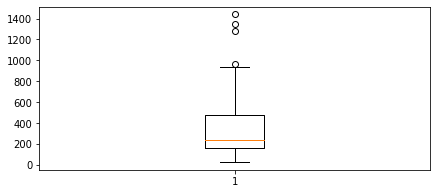

In [ ]:
plt.rcParams["figure.figsize"] = (7,3)
plt.boxplot(pivotdf['count'])

Average is around 200. Mostly is between 200 and 400. Few districts are outliers. No doubt, Charlottenburg Nord is one of the few safest districts in Berlin for our bicycles (relatively!)

In [ ]:
dff['ART_DES_FAHRRADS'].value_counts()

Herrenfahrrad        9990
Damenfahrrad         6405
Fahrrad              2616
Mountainbike          964
Kinderfahrrad         830
diverse Fahrräder     488
Rennrad               289
Lastenfahrrad          30
Name: ART_DES_FAHRRADS, dtype: int64

In [ ]:
pd.pivot_table(dff,
              index='PGR Name',
              columns='ART_DES_FAHRRADS',
              values='SCHADENSHOEHE',
              aggfunc=('mean','count')).fillna(0)

count                        \
ART_DES_FAHRRADS                   Damenfahrrad Fahrrad Herrenfahrrad   
PGR Name                                                                
Biesdorf                                   44.0    12.0          47.0   
Britz / Buckow                             53.0    26.0          69.0   
Buch                                       42.0     5.0          37.0   
Buckow Nord / Rudow                        38.0     7.0          40.0   
Charlottenburg Nord                        23.0     6.0          19.0   
Charlottenburg West                        81.0    22.0         100.0   
Charlottenburg Zentrum                    292.0   123.0         460.0   
Friedenau                                 101.0    23.0         123.0   
Friedrichshain Ost                        174.0   105.0         336.0   
Friedrichshain West                       118.0    66.0         243.0   
Gatow / Kladow                              6.0     6.0          11.0   
Gesund- brunnen                           112.0    69.0         188.0   
Gropiusstadt                               25.0    11.0          22.0   
Grüner Norden                              54.0    26.0         113.0   
Haselhorst / Siemensstadt                  43.0     7.0          54.0   
Hellersdorf                                48.0    15.0          49.0   
Hohenschön- hausen Nord                    37.0    11.0          48.0   
Hohenschön- hausen Süd                     66.0    20.0          73.0   
Kaulsdorf / Mahlsdorf                      54.0    11.0          67.0   
Kreuzberg Nord                             90.0    63.0         169.0   
Kreuzberg Ost                             149.0   125.0         340.0   
Kreuzberg Süd                             194.0    72.0         300.0   
Lankwitz / Lichterfelde Ost                75.0    25.0         114.0   
Lichtenberg Mitte                          98.0    35.0         168.0   
Lichtenberg Nord                          102.0    36.0         141.0   
Lichtenberg Süd                            74.0    29.0         103.0   
Mariendorf                                 51.0     9.0          32.0   
Marienfelde / Lichtenrade                  35.0    18.0          51.0   
Marzahn                                    60.0    23.0          69.0   
Moabit                                    173.0    93.0         315.0   
Märkisches Viertel                         29.0    11.0          26.0   
Neukölln                                  372.0   208.0         666.0   
Nördlicher Prenzlauer Berg                348.0   139.0         643.0   
Nördliches Pankow                          53.0    20.0          90.0   
Nördliches Weißensee                       77.0    19.0          98.0   
Reinickendorf Ost                          53.0    14.0          68.0   
Schöneberg Nord                           139.0    66.0         221.0   
Schöneberg Süd                            130.0    52.0         177.0   
Spandau Mitte / Nord                       77.0    19.0          94.0   
Steglitz                                  124.0    42.0         175.0   
Südlicher Prenzlauer Berg                 179.0    56.0         302.0   
Südliches Pankow                          244.0    72.0         349.0   
Südliches Weißensee                        88.0    30.0         118.0   
Tegel                                      52.0    11.0          70.0   
Tempelhof                                 125.0    48.0         107.0   
Treptow- Köpenick 1                       182.0    66.0         251.0   
Treptow- Köpenick 2                       170.0    59.0         274.0   
Treptow- Köpenick 3                        52.0    27.0          71.0   
Treptow- Köpenick 4                        51.0    12.0          66.0   
Treptow- Köpenick 5                       103.0    29.0         158.0   
Wedding                                   129.0    78.0         244.0   
Wilhelmstadt / Staaken                     62.0    24.0          82.0   
Wilmersdorf Süd            

Ill export two pivot tables- mean and count - and display these in Tableau!

## Export CSV files

In [ ]:
piv_mean = pd.pivot_table(dff,
              index='PGR Name',
              columns='ART_DES_FAHRRADS',
              values='SCHADENSHOEHE',
              aggfunc='mean').fillna(0)

In [ ]:
piv_cnt = pd.pivot_table(dff,
              index='PGR Name',
              columns='ART_DES_FAHRRADS',
              values='SCHADENSHOEHE',
              aggfunc='count').fillna(0)

In [ ]:
piv_mean.to_csv('bicycle_mean.csv')
piv_cnt.to_csv('bicycle_cnt.csv')